<a href="https://colab.research.google.com/github/AlenaResiko/Project_CH_intersect/blob/main/Check_intersections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Alena Chan; last changed 24 Oct

In [ ]:
import numpy as np
import math

In [ ]:
# given a triangle, compute its plane, return normal vector and n*x

def plane(v1, v2, v3): # v are vertices of a triangle, each is a 3x1 matrix
  # n[0] * x + n[1] * y + n[2] * z - c = 0 is the equation determining the plane
  a = v1 - v2
  b = v1 - v3
  n = np.cross(a, b)
  n = n / math.sqrt(np.dot(n, n))
  c = np.dot(n, v1)
  return n, c

In [ ]:
v1 = np.array([1.0, 0.0, 0.0])
v2 = np.array([0.0, 1.0, 0.0])
v3 = np.array([0.0, 0.0, 1.0])

n1, c1 = plane(v1, v2, v3)
print("unit normal vector", n1)
print("n * x = ", c1)

unit normal vector [0.57735027 0.57735027 0.57735027]
n * x =  0.5773502691896258


In [ ]:
def check_degenerate(v1, v2, v3):
  return not np.cross((v1-v2), (v1-v3)).any()

In [ ]:
v1 = np.array([1.0, 0.0, 0.0])
v2 = np.array([2.0, 0.0, 0.0])
v3 = np.array([1.3, 0.0, 0.1])

print(check_degenerate(v1, v2, v3))

False


In [ ]:
def intersection_line(n1, n2, c1, c2):
  r = np.cross(n1, n2)
  r = r / math.sqrt(np.dot(r, r))
  if r[0] != 0:
    x = 0
    # a = [[n1[1], n1[2]], [n2[1], n2[2]]] # coef matrix
    a_inverse = [[n2[2], -n1[2]], [-n2[1], n1[1]]] / (n1[1]*n2[2]-n2[1]*n1[2])
    b = [c1, c2]
    # y, z = solve((n1[1]*y+n1[2]*z=c1) and (n2[1]*y+n2[2]*z=c2))
    [y, z] = np.dot(a_inverse, b)
  else:
    y = 0
    # a = [[n1[0], n1[2]], [n2[0], n2[2]]] # coef matrix
    a_inverse = [[n2[2], -n1[2]], [-n2[0], n1[0]]] / (n1[0]*n2[2]-n2[0]*n1[2])
    b = [c1, c2]
    [x, z] = np.dot(a_inverse, b)
  p = [x, y, z] # point on line of intersection
  return r, p

In [ ]:
n1 = np.array([1.0, 1.0, 1.0])
n2 = np.array([1.0, 2.0, 3.0])
c1 = -1.0
c2 = -4.0

r,c = intersection_line(n1, n2, c1, c2)
print(r,c)

[ 0.40824829 -0.81649658  0.40824829] [0, 1.0, -2.0]


In [ ]:
n1 = np.array([1.0, 2.0, 3.0])
n2 = np.array([1.3, 2.7, -8.0])
c1 = -4.0
c2 = -5.0

r,c = intersection_line(n1, n2, c1, c2)
print(r,c)

[-0.89664216  0.44274032  0.00372051] [0, -1.9502074688796678, -0.033195020746888015]


In [ ]:
print(np.dot(n1, c))
print(np.dot(n2, c))

-3.9999999999999996
-5.0


In [ ]:
def t_intersect(v1, v2, v3, u1, u2, u3):
  if check_degenerate(v1, v2, v3) or check_degenerate(u1, u2, u3):
    return ("Triangles cannot be degenerate.")
  n1, c1 = plane(v1, v2, v3)
  n2, c2 = plane(u1, u2, u3)

  d_1_1 = np.dot(n2, v1) - c2 # vertex 1, triangle 1, about plane 2
  d_2_1 = np.dot(n2, v2) - c2 # vertex 2, triangle 1, about plane 2
  d_3_1 = np.dot(n2, v2) - c2
  d_1_2 = np.dot(n1, u1) - c1
  d_2_2 = np.dot(n1, u2) - c1
  d_3_2 = np.dot(n1, u3) - c1

  # check if all vertices of triangle are on same side of plane containing another triangle
  if (d_1_1 > 0 and d_2_1 > 0 and d_3_1 > 0) or (d_1_2 > 0 and d_2_2 > 0 and d_3_2 > 0):
    return False

  r,p = intersection_line(n1, n2, c1, c2) # r is direction vector, p is point on the line L
  # from rejections and tests above, both triangles are guaranteed to intersect L

  # we want v1 and v3 lie on same side of L and V2 lies on another
  # this is true iff d_1_1 and d_3_1 are same sign but d_2_1 is different sign
  # fix
  if d_1_1*d_2_1 > 0: # v1 and v2 are on same side
    # swap v3 with v2
    v2, v3 = v3, v2
    d_1_1, d_3_1 = d_3_1, d_1_1

  p_v1 = np.dot(r, (v1 - p))
  p_v2 = np.dot(r, (v2 - p))
  p_v3 = np.dot(r, (v3 - p))


  t_1 = p_v1 + (p_v2 - p_v1) * d_1_1 / (d_1_1 - d_2_1)
  t_3 = p_v3 + (p_v2 - p_v3) * d_3_1 / (d_3_1 - d_2_1)
  if t_1 > t_3:
    t_1, t_3 = t_3, t_1
  # t_1 and t_3 are parameters on line L = r*t+p; t_1 and t_3 correspond to ends of projection of triangle 1 onto L

  # fix so that points u1 and u3 lie on same side of L and u2 is on another side
  if d_1_2*d_2_2 > 0:
    # swap u3 with u2
    u2, u3 = u3, u2
    d_1_2, d_3_2 = d_3_2, d_1_2

  p_u1 = np.dot(r, (u1 - p))
  p_u2 = np.dot(r, (u2 - p))
  p_u3 = np.dot(r, (u3 - p))

  k_1 = p_u1 + (p_u2 - p_u1) * d_1_2 / (d_1_2 - d_2_2)
  k_3 = p_u3 + (p_u2 - p_u3) * d_3_2 / (d_3_2 - d_2_2)
  if k_1 > k_3:
    k_1, k_3 = k_3, k_1

  # intersect = (t_1, t_3) intersects (k_1, k_3)
  intersect = ((t_1 <= k_1 <= t_3)or (t_1 <= k_3 <= t_3) or (k_1 <= t_1 <= k_3))

  return intersect

In [ ]:
V1 = np.array([1.0, 1.0, 1.0])
V2 = np.array([2.0, 0.5, 1.0])
V3 = np.array([0.0, 3.0, 0.0])

U1 = np.array([1.0, 1.0, 0.1])
U2 = np.array([1.5, 1.4, 2.0])
U3 = np.array([-0.1, 2.1, 0.2])

t_intersect(V1, V2, V3, U1, U2, U3)

<ipython-input-63-3f96fcd5503a>:35: RuntimeWarning: divide by zero encountered in double_scalars
  t_3 = p_v3 + (p_v2 - p_v3) * d_3_1 / (d_3_1 - d_2_1)


True

In [ ]:
V1 = np.array([1.0, 1.0, 1.0])
V2 = np.array([2.0, 0.5, 1.0])
V3 = np.array([0.0, 3.0, 0.0])

U1 = np.array([1.0, 1.0, 0.1])
U2 = np.array([1.5, 1.4, 2.0])
U3 = np.array([-0.1, 2.1, 0.2])

t_intersect(V1, V2, V3, U1, U2, U3)

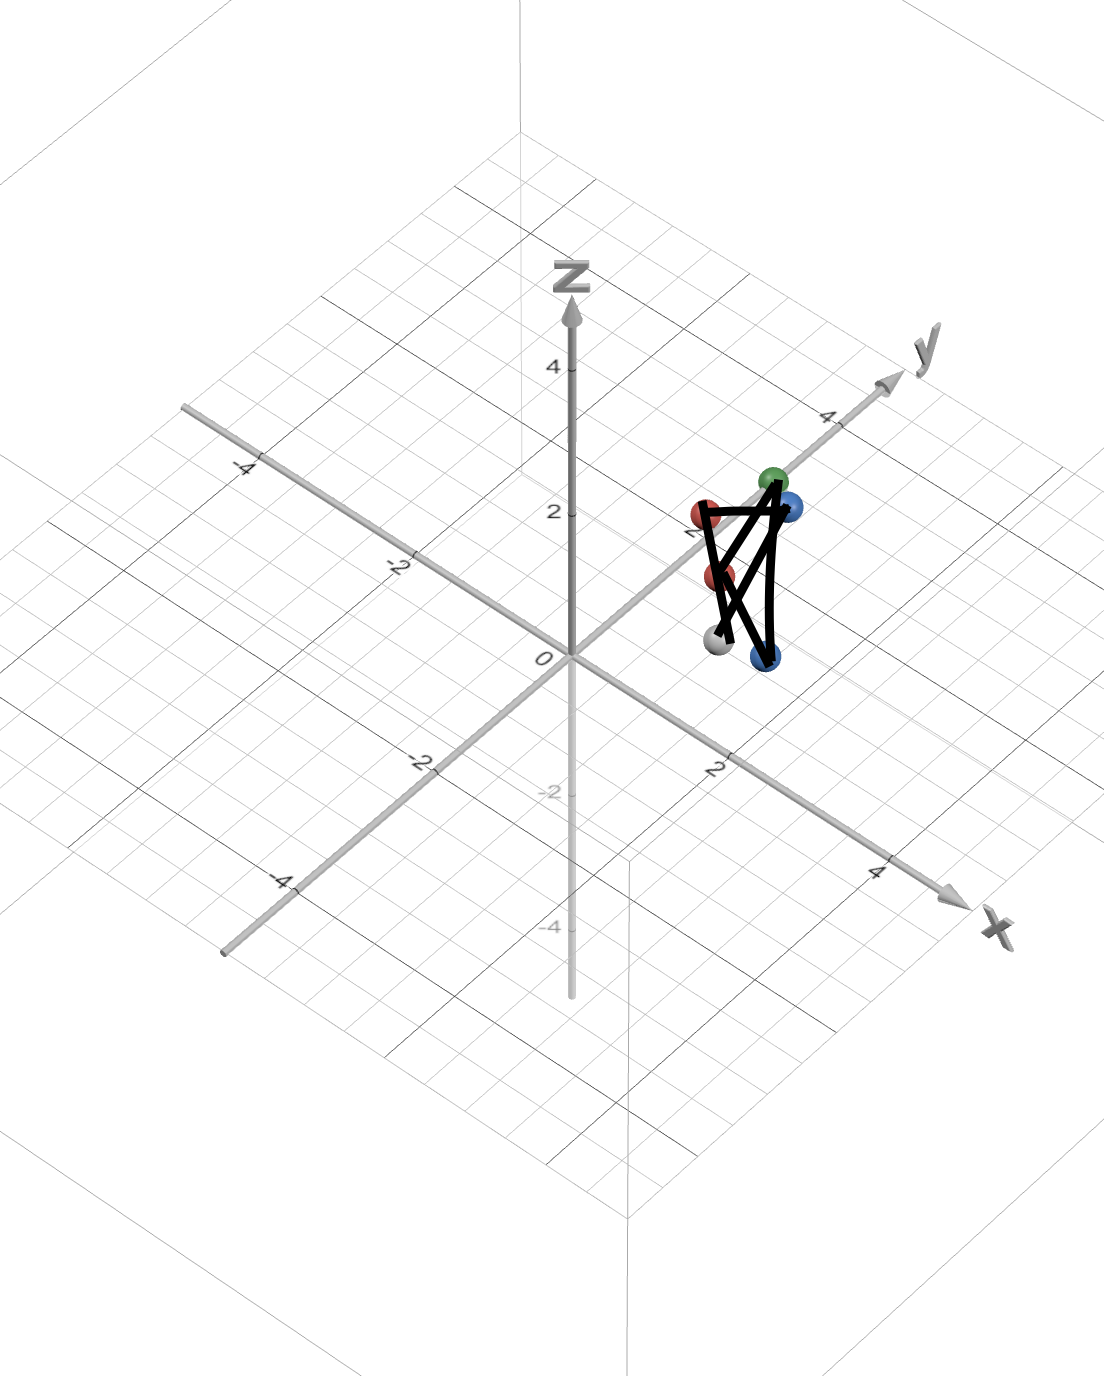

In [ ]:
V1 = np.array([1.0, 1.0, 1.0])
V2 = np.array([2.0, 0.5, 1.0])
V3 = np.array([0.0, 3.0, 0.0])

U1 = np.array([120.0, 140.0, 124.5])
U2 = np.array([152.0, 120.4, 83.2])
U3 = np.array([123.4, 153.9, 80.9])

t_intersect(V1, V2, V3, U1, U2, U3)

False

In [ ]:
# Sources:
# https://fileadmin.cs.lth.se/cs/Personal/Tomas_Akenine-Moller/code/tritri_tam.pdf

In [ ]:
# [2] make overleaf document - algorithm and proof that it works
# check each step

# [1] find how to find plane contain 3 points in 4d